<h1 align="center">Disease Modelling - Alzheimer’s Disease</h1> 

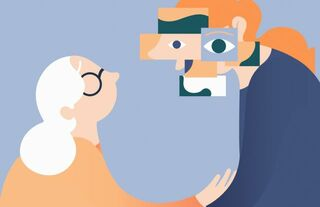

Alzheimer's disease is a progressive disorder in which dementia symptoms gradually worsen over time.Even though current Alzheimer's treatments cannot reverse the disease, they can temporarily slow the onset of dementia symptoms and enhance quality of life for those with Alzheimer's. Detecting Alzheimer's disease as soon as it begins is essential, as there is no way to reverse irreversible changes in the brain after they have occurred. Image processing plays a critical role in this process.

The Alzheimer's disease dataset contains MRI scans which is divided into four classes namely MildDemented, ModerateDemented, NonDemented, and VeryMildDemented.

### Importing Required Packages

In [304]:
#general
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import random
import squarify
import seaborn as sns

random.seed(41400771)
#image data generation
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# model building and plotting
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.utils.vis_utils import plot_model
import keras

#for model accuracy
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report

### Loading the Data 

In [305]:
#Unzipping the data folder in local dir
import zipfile
with zipfile.ZipFile("./MRIData.zip","r") as zip_ref:
    zip_ref.extractall("./")

In [306]:
#setting the root directory
ROOT_DIR  = './MRIData'

### Data Visualization

In [307]:
#creating a function to visualize the dataset
def visualize(direction):
    list_dir=os.listdir(direction)
    plt.figure(figsize=(14,8))
    for i in range(1,4):
        plt.subplot(2,3,i)
        img= plt.imread(os.path.join(direction,list_dir[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

#### MRI Scans of Mild Demented Case

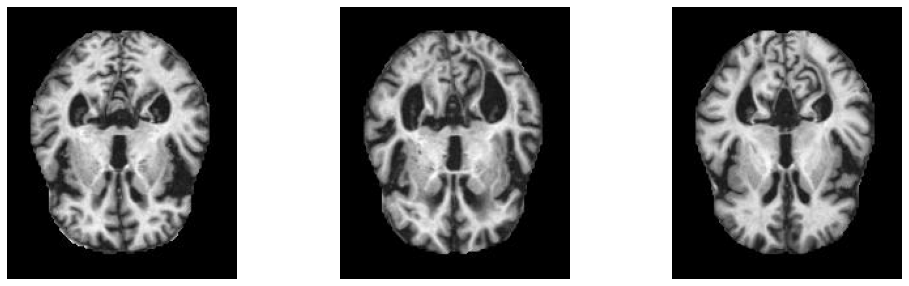

In [308]:
#visualization of MildDemented MRI Scans
MildDemented_dir= ROOT_DIR + '/MildDemented'
visualize(MildDemented_dir)

#### MRI Scans of Moderate Demented Case

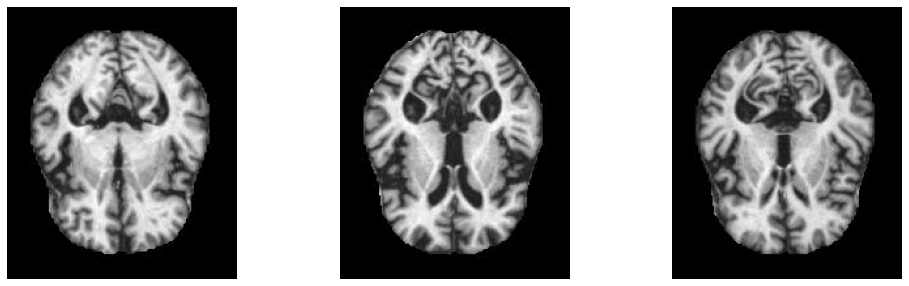

In [309]:
#visualization of ModerateDemented MRI Scans
ModerateDemented_dir= ROOT_DIR + '/ModerateDemented'
visualize(ModerateDemented_dir)

#### MRI Scans of Non-Demented Case

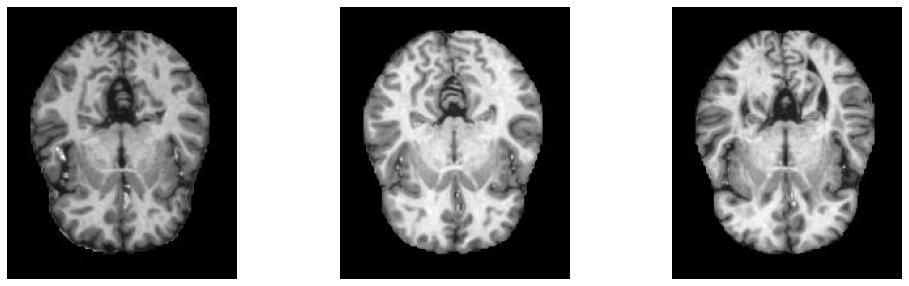

In [310]:
#visualization of NonDemented MRI Scans
NonDemented_dir= ROOT_DIR + '/NonDemented'
visualize(NonDemented_dir)

#### MRI Scans of Very Mild Demented Case

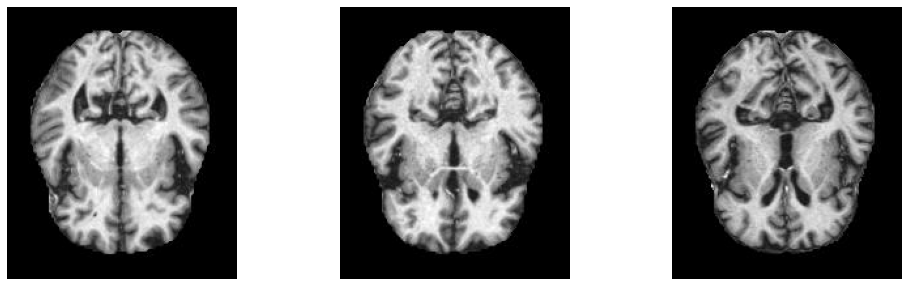

In [311]:
#visualization of VeryMildDemented MRI Scans
VeryMildDemented_dir= ROOT_DIR + '/VeryMildDemented'
visualize(VeryMildDemented_dir)

In [312]:
number_of_images = {}

#to check the count of each classes
for dir in os.listdir(ROOT_DIR):
   number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('MildDemented', 717), ('ModerateDemented', 52), ('NonDemented', 2560), ('VeryMildDemented', 1792)])

### Image Data Generation

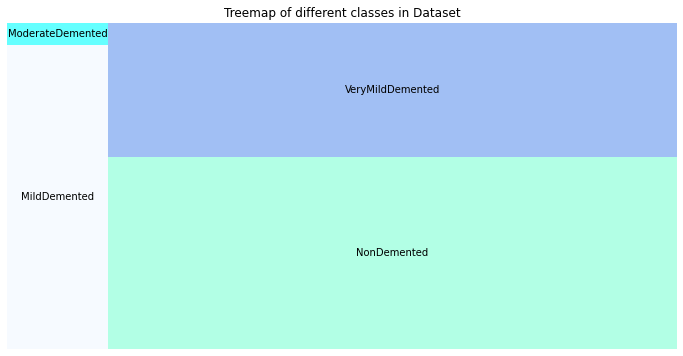

In [313]:
#treemap for class distribution
image_folder = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('./MRIData/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(12, 6))
color=['#F0F8FF','#00FFFF','#7FFFD4','#6495ED']
squarify.plot(sizes=list(nimgs.values()), label=list(nimgs.keys()),color=color,alpha=0.6 )
plt.axis('off')
plt.title('Treemap of different classes in Dataset')
plt.show()

The Dataset has uneven MRI scans, i.e from the above graph we can observe that Non Denmented and VeryMildDemented class has fairly larger images compared to the other two.Hence, to reduce the imbalance ImageDataGenerator is employed.

In [314]:
# ImageDataGenerator function
datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')


# generating ModerateDemented MRI scans
directory = os.path.join(ROOT_DIR,'ModerateDemented')

for pic in os.listdir(directory):
    picture = os.path.join(directory, pic) 
    picuse = load_img(picture)
    pic_array = img_to_array(picuse)
    X = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
    count = 0
    for batch in datagen.flow(X, batch_size=1,save_to_dir=directory, save_prefix='ModerateDemented', save_format='jpeg'):
        count += 1
        if count > 80:
            break


# generating MildDemented MRI scans

directory1 = os.path.join(ROOT_DIR,'MildDemented')
            
for pic in os.listdir(directory1):
    picture = os.path.join(directory1, pic) 
    picuse = load_img(picture)
    pic_array = img_to_array(picuse)
    X = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
    count = 0
    for batch in datagen.flow(X, batch_size=1,save_to_dir=directory1, save_prefix='MildDemented', save_format='jpeg'):
        count += 1
        if count > 4:
            break

# generating VeryMildDemented MRI scans       
    
directory2 = os.path.join(ROOT_DIR,'VeryMildDemented')
            
for pic in os.listdir(directory2):
    picture = os.path.join(directory2, pic) 
    picuse = load_img(picture)
    pic_array = img_to_array(picuse)
    X = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
    count = 0
    for batch in datagen.flow(X, batch_size=1,save_to_dir=directory2, save_prefix='VeryMildDemented', save_format='jpeg'):
        count += 1
        if count > 0.5:
            break   
            
# generating NonDemented MRI scans 

directory3 = os.path.join(ROOT_DIR,'NonDemented')
            
for pic in os.listdir(directory3):
    picture = os.path.join(directory3, pic) 
    picuse = load_img(picture)
    pic_array = img_to_array(picuse)
    X = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
    count = 0
    for batch in datagen.flow(X, batch_size=1,save_to_dir=directory3, save_prefix='NonDemented', save_format='jpeg'):
        count += 1
        if count > 0.2:
            break


In [315]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('MildDemented', 3730), ('ModerateDemented', 3480), ('NonDemented', 4834), ('VeryMildDemented', 3430)])

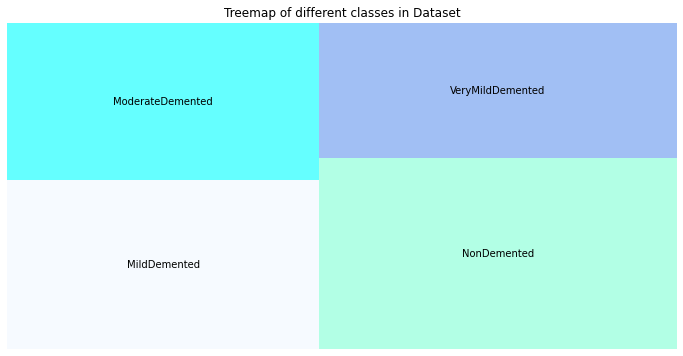

In [316]:
#treemap for class distribution aftre data generation
image_folder = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('./MRIData/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(12, 6))
color=['#F0F8FF','#00FFFF','#7FFFD4','#6495ED']
squarify.plot(sizes=list(nimgs.values()), label=list(nimgs.keys()),color=color,alpha=0.6 )
plt.axis('off')
plt.title('Treemap of different classes in Dataset')
plt.show()

From the above tree map we can infer that from thr data generation process the classes are approximately balanced.

### Splitting the Data for Model

* 70% of dataset - Training Data
* 15% of dataset - Testing Data
* 15% of dataset - Validation Data


In [317]:
# function to split the data
def datafolder(path,split):
  if not os.path.exists('./'+path):
   os.mkdir('./'+path)

   for dir in os.listdir(ROOT_DIR):
     os.makedirs('./'+path+"/"+dir)

     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                 size=(math.floor(split*number_of_images[dir])-2),
                                       replace=False):
       O = os.path.join(ROOT_DIR,dir,img)
       D = os.path.join('./'+path,dir)
       shutil.copy(O,D)
       os.remove(O)
  else:
   print("the folder exist")

In [318]:
#to delete existing folder
shutil.rmtree('./train')
shutil.rmtree('./val')
shutil.rmtree('./test')

In [319]:
datafolder("train",0.7)

In [320]:
datafolder("val",0.15)

In [321]:
datafolder("test",0.15)

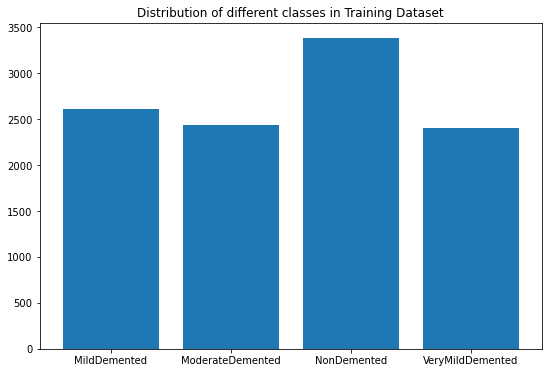

In [322]:
# visualization of class distribution for train data
image_folder = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('./train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

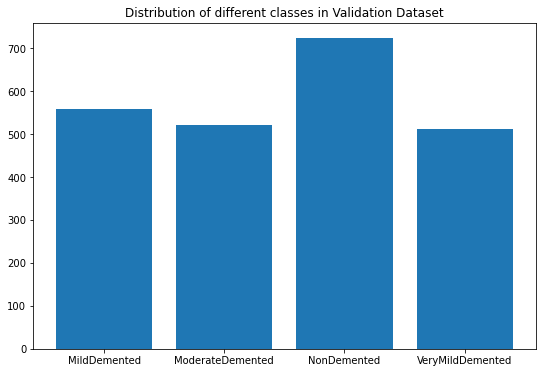

In [323]:
# visualization of class distribution for Validation data
image_folder1 = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
nimgs1 = {}
for j in image_folder1:
    nimages1 = len(os.listdir('./val/'+j+'/'))
    nimgs1[j]=nimages1
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs1)), list(nimgs1.values()), align='center',)
plt.xticks(range(len(nimgs1)), list(nimgs1.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

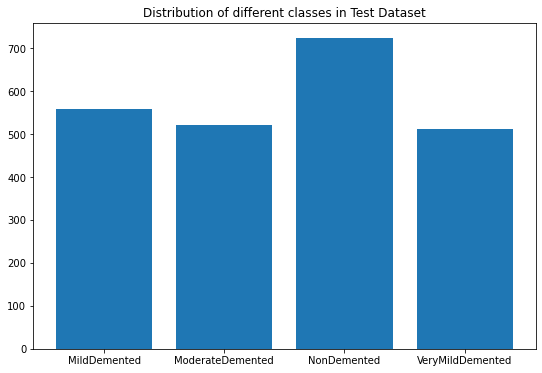

In [324]:
# visualization of class distribution for test data
image_folder2 = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
nimgs2 = {}
for k in image_folder2:
    nimages2 = len(os.listdir('./test/'+k+'/'))
    nimgs2[k]=nimages2
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs2)), list(nimgs2.values()), align='center')
plt.xticks(range(len(nimgs2)), list(nimgs2.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

### Pre-Processing the Images

In [325]:
#data pre-processing function for train
def preproimage(path):

  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function=preprocess_input,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')

  return image

In [326]:
path1 = './train'
train_data = preproimage(path1)

Found 10823 images belonging to 4 classes.


In [327]:
#data pre-processing function for test
def preproimage1(path):

  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=False)

  return image

In [328]:
path2 = './test'
test_data = preproimage1(path2)

Found 2312 images belonging to 4 classes.


In [329]:
#data pre-processing function for validation
def preproimage2(path):

  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='categorical')

  return image

In [330]:
path3 = './val'
val_data = preproimage2(path3)

Found 2312 images belonging to 4 classes.


### Model Training

We are employing the pre-trained model called **MobileNet** for our multi-class classification.

In [331]:
#downloading MobileNet model
base_model = MobileNet(input_shape=(224,224,3),include_top= False)

In [332]:
#to aovid retatrining
for layers in base_model.layers:
    layers.trainable = False

In [333]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [334]:
#adding flatten and output layer
X= Flatten()(base_model.output)
X = Dense(units=4,activation = 'softmax')(X)

model = Model(base_model.input,X)

In [335]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

Compiling the model with optimizer as **adma** and **categorical_crossentropy** as loss function.

In [336]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

Setting up EarlyStopping to train the model by considering val_accuracy as a main parameter with patience 20, i.e if the val_accuracy doesnot increases after 20 consecutive epochs the model will stop training before the completion of specified epochs.

In [337]:
# setting EarlyStopping for validation accuracy
from keras.callbacks import ModelCheckpoint,EarlyStopping

es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=18,verbose=1,mode='auto')

mc = ModelCheckpoint(monitor="val_accuracy",filepath='./bestmodel.h5',verbose=1,save_best_only=True,mode='auto')

cb = [es,mc]

### Fitting the Model

In [338]:
#Training the built model
hs = model.fit_generator(generator=train_data,steps_per_epoch=50,
                         epochs=55,verbose=1,validation_data=val_data,
                         validation_steps=50,callbacks=cb)

<ipython-input-338-153f48f4c6bc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator=train_data,steps_per_epoch=50,


Epoch 1/55
50/50 [==============================] - ETA: 0s - loss: 6.0362 - accuracy: 0.4550
Epoch 1: val_accuracy improved from -inf to 0.57875, saving model to .\bestmodel.h5
50/50 [==============================] - 81s 2s/step - loss: 6.0362 - accuracy: 0.4550 - val_loss: 2.6181 - val_accuracy: 0.5788
Epoch 2/55
50/50 [==============================] - ETA: 0s - loss: 3.1301 - accuracy: 0.5656
Epoch 2: val_accuracy did not improve from 0.57875
50/50 [==============================] - 75s 1s/step - loss: 3.1301 - accuracy: 0.5656 - val_loss: 3.3911 - val_accuracy: 0.4719
Epoch 3/55
50/50 [==============================] - ETA: 0s - loss: 2.9295 - accuracy: 0.5969
Epoch 3: val_accuracy improved from 0.57875 to 0.62875, saving model to .\bestmodel.h5
50/50 [==============================] - 75s 2s/step - loss: 2.9295 - accuracy: 0.5969 - val_loss: 2.4356 - val_accuracy: 0.6288
Epoch 4/55
50/50 [==============================] - ETA: 0s - loss: 2.4799 - accuracy: 0.6375
Epoch 4: val_ac

### Visualization of Model Results

In [339]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

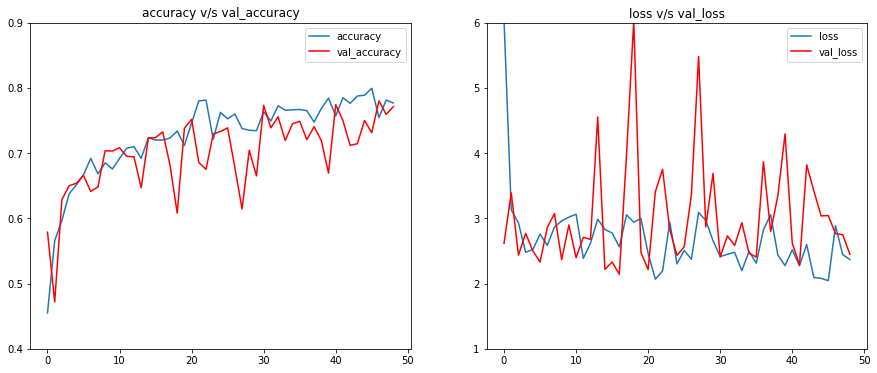

In [340]:
#accuracy v/s val_accuracy plot
plt.subplot(1, 2, 1)
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(h['accuracy'],label='accuracy')
plt.plot(h['val_accuracy'],c='red',label='val_accuracy')
plt.title('accuracy v/s val_accuracy')
plt.legend()
plt.ylim(0.4,0.9)

#loss v/s val_loss plot
plt.subplot(1, 2, 2)
plt.plot(h['loss'],label='loss')
plt.plot(h['val_loss'],c='red',label='val_loss')
plt.title('loss v/s val_loss')
plt.legend()
plt.ylim(1,6)
plt.show()

### Model Accuracy and Prediction

In [341]:
#loading the best model
model=load_model('./bestmodel.h5')

In [342]:
#testing accuracy
acc = model.evaluate_generator(test_data)[1]

print(f"The test accuracy of model is : {acc*100} % ")

<ipython-input-342-94aa23aff0ee>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


The test accuracy of model is : 76.16782188415527 % 


In [343]:
train_data.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

Predicting the class for a MRI scan which was not a part modelling or testing process by selecting any droped out image from original directory

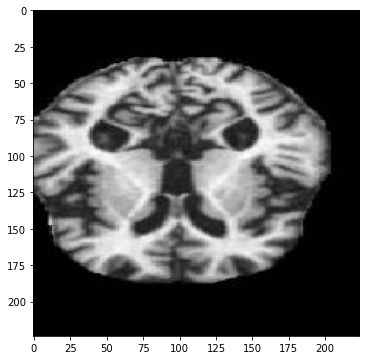

1/1 [==============================] - 0s 138ms/step
The MRI shows ModerateDemented stage of Alziemer's 


In [350]:
#change path accordingly
path = './MRIData/ModerateDemented/ModerateDemented_0_2509.jpeg'

img = load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr,axis=0);
pred=model.predict(input_arr);
pred= pred.argmax(axis=1)[0];

if pred==0:
    print("The MRI shows MildDemented stage of Alziemer's ")
elif pred==1:
    print("The MRI shows ModerateDemented stage of Alziemer's ")
elif pred==2:
    print("The MRI shows NonDemented stage of Alziemer's ")
else:
    print("The MRI shows VeryMildDemented stage of Alziemer's ")

In [345]:
#predicting for test data
pred1=model.predict(test_data)

73/73 [==============================] - 52s 696ms/step


In [346]:
#selecting highest probability class out of predictions
pred2 = pred1.argmax(axis=1)

In [347]:
#confusion matrix
result = confusion_matrix(test_data.classes, pred2)
classes=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
print(result)


[[434  15  17  91]
 [  3 516   1   0]
 [ 79  16 484 144]
 [104  19  62 327]]


In [348]:
#classification report of trained model
print(classification_report(test_data.classes, pred2, target_names=classes))

                  precision    recall  f1-score   support

    MildDemented       0.70      0.78      0.74       557
ModerateDemented       0.91      0.99      0.95       520
     NonDemented       0.86      0.67      0.75       723
VeryMildDemented       0.58      0.64      0.61       512

        accuracy                           0.76      2312
       macro avg       0.76      0.77      0.76      2312
    weighted avg       0.77      0.76      0.76      2312



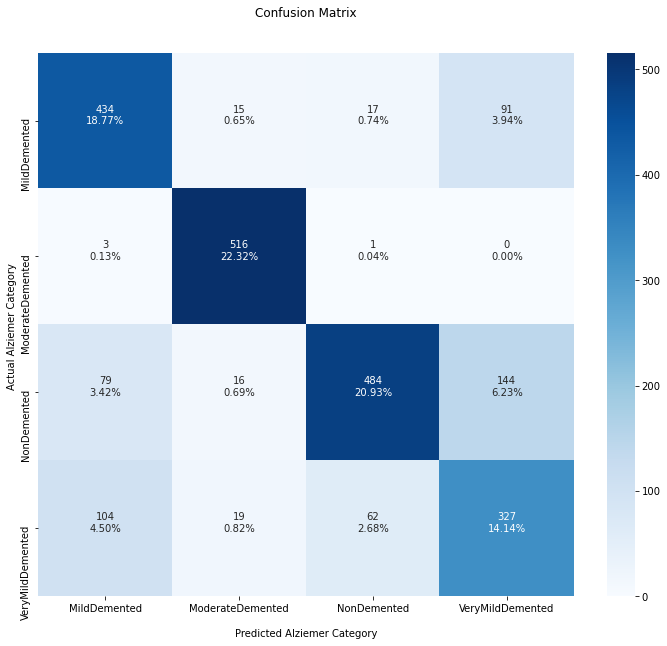

In [349]:
# visualization of confusion matrix
plt.figure(figsize=(12,10))

group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)

ax = sns.heatmap(result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Alziemer Category')
ax.set_ylabel('Actual Alziemer Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])
ax.yaxis.set_ticklabels(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

## Display the visualization of the Confusion Matrix.
plt.show()